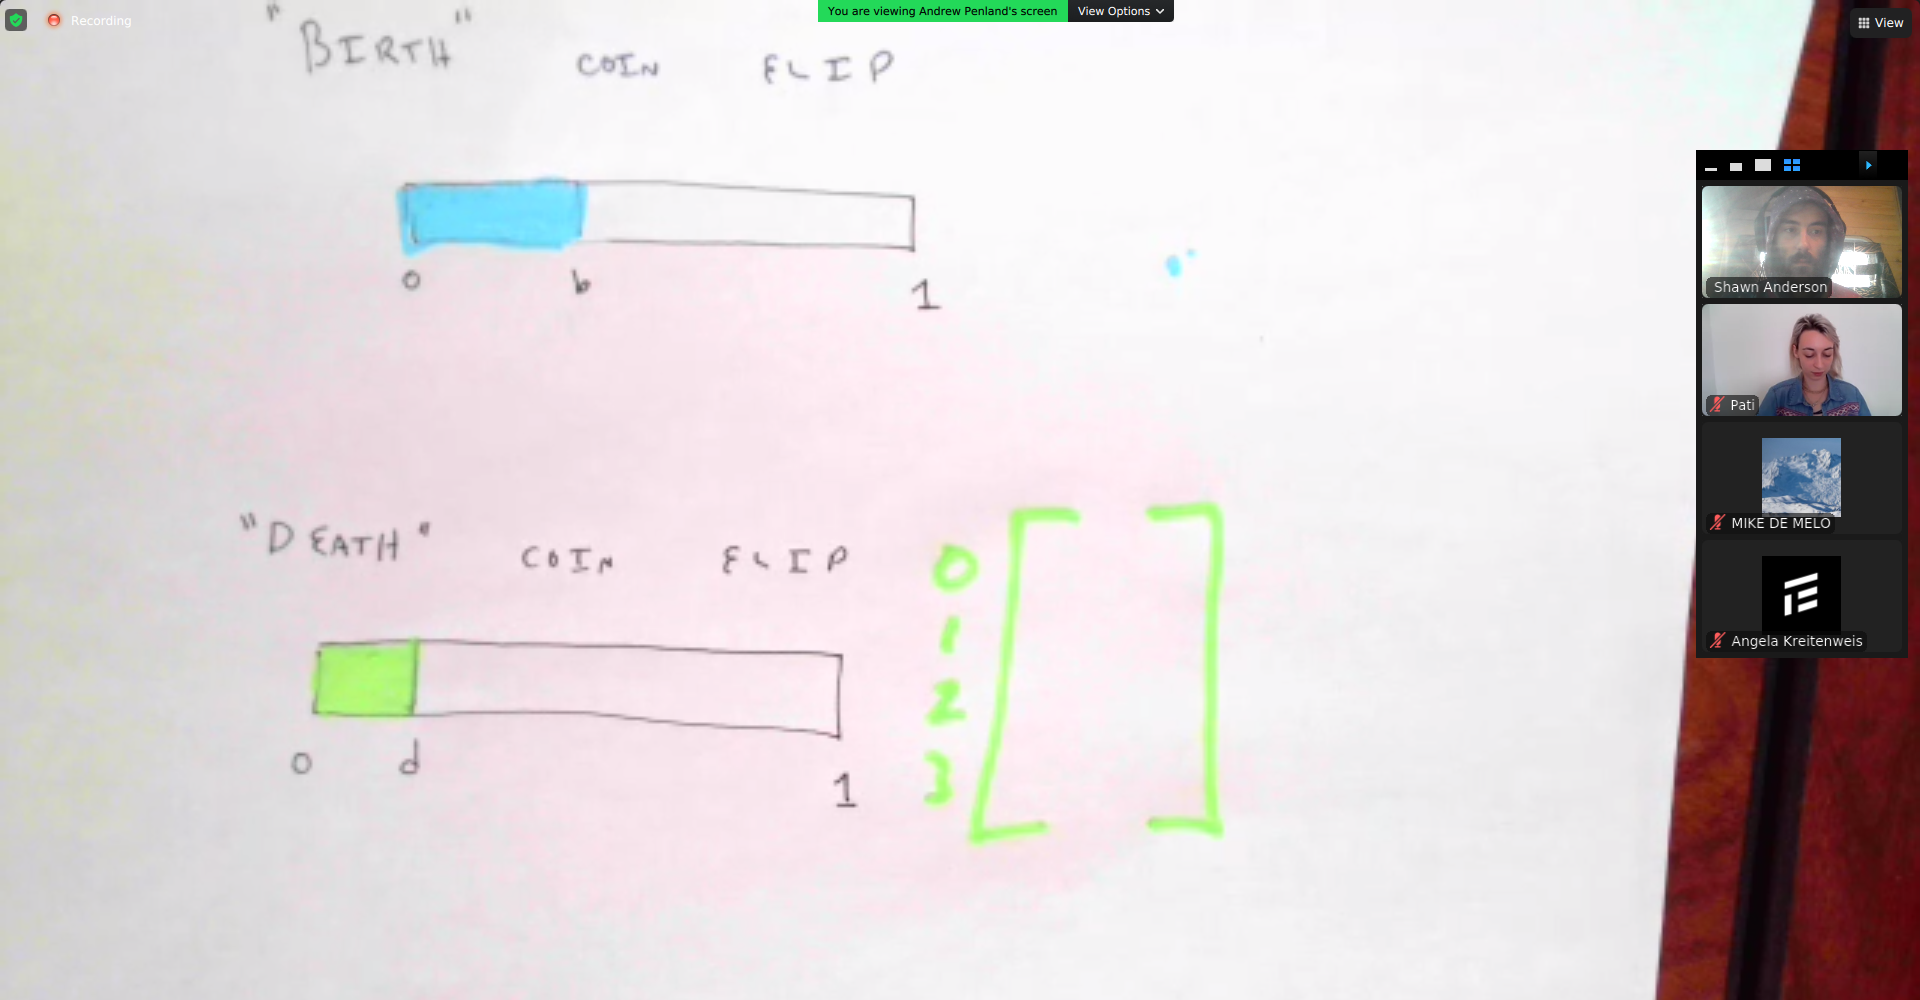

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
from cadCAD.configuration import Experiment
from cadCAD.configuration.utils import config_sim
from cadCAD.engine import ExecutionMode, ExecutionContext, Executor
from cadCAD import configs

## Definitions 

### Initial Conditions and Parameters

In [3]:
initial_state = {
    'busy_tables': 0,
    }

params = {
    "total_tables": [3, 6],
    "birth_rate": [0.1, 0.2], # probability someone arrives
    "death_rate": [0.25] #probability someone leaves

}

### Policies 

In [4]:
np.random.uniform()

0.0953318717566981

In [5]:
def p_birth_coin_flip(params, step, sL, s):
    flip = np.random.uniform()
    birth_result = flip < params['birth_rate'][0] #increase by 0 or 1
    return {'birth_result': birth_result}


def p_death_coin_flip(params, step, sL, s):
    flip = np.random.uniform()
    death_result = flip < params['death_rate'][0]
    return {'death_result': death_result}

### State Update Functions 

In [6]:
def s_tables(params, substep, state_history, previous_state,
             policy_input):
    death_change = policy_input["death_result"]
    birth_change = policy_input["birth_result"]
    old_tables = previous_state['busy_tables']
    if old_tables == 3:
        new_tables = old_tables 
        if death_change == 1:
            new_tables = old_tables + birth_change - death_change
    elif old_tables == 0:
        new_tables = old_tables + birth_change
    else: 
        new_tables = old_tables + birth_change - death_change
    return 'busy_tables', new_tables

In [7]:
partial_state_update_blocks = [
    {
        'policies': {
            'p_birth_coin_flip': p_birth_coin_flip,
            'p_death_coin_flip': p_death_coin_flip,

        },
        'variables': {
            'busy_tables': s_tables,
        }
    }
]

In [8]:
sim_config = {
    'N': 5, # Number of Simulations
    'T': range(100), # Timesteps
    'M': params
}

del configs[:] # Clear any prior configs
experiment = Experiment()
experiment.append_configs(
    initial_state = initial_state,
    partial_state_update_blocks = partial_state_update_blocks,
    sim_configs = sim_config,
)

exec_mode = ExecutionMode()
exec_context = ExecutionContext()

In [9]:
configs = experiment.configs

In [10]:
simulation = Executor(exec_context=exec_context, configs=configs)
raw_result, tensor_field, sessions = simulation.execute()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 3, 5, 1)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 3, 5, 1)
Execution Method: local_simulations
Execution Mode: parallelized
Total execution time: 0.45s


In [11]:
simulation_result = pd.DataFrame(raw_result)#.set_index('timestep')

In [12]:
len(simulation_result)

505

In [13]:
simulation_result[simulation_result['subset']==0].plot(y='busy_tables')